In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Чтение датасета из файла </br>
## Извлечение временного ряда </br>
## Даты начала и конца временного ряда

In [2]:
data = pd.read_csv('./res/milk.csv')
time_series = data['milk']
start_date = '01-01-2000'
end_date = '01-01-2014'

## Создание индекса временного ряда </br>
## Индекс содержит даты между start_date и end_date с шагом в месяц

In [3]:
date_index = pd.date_range(start=start_date, end=end_date, freq='M')
time_series.index = date_index

Построение графика исходного временного ряда
============================================

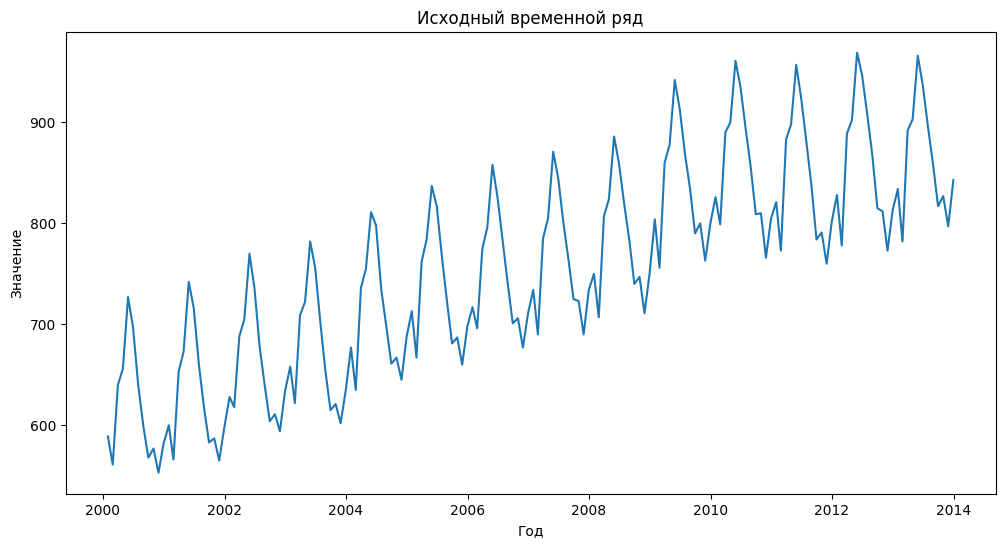

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Исходный временной ряд')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.show()

### Использование метода seasonal_decompose для анализа сезонности </br> 
### (разложения временного ряда на компоненты тренда и сезонности).

In [5]:
result = seasonal_decompose(time_series, model='additive', period=12)

# График тренда

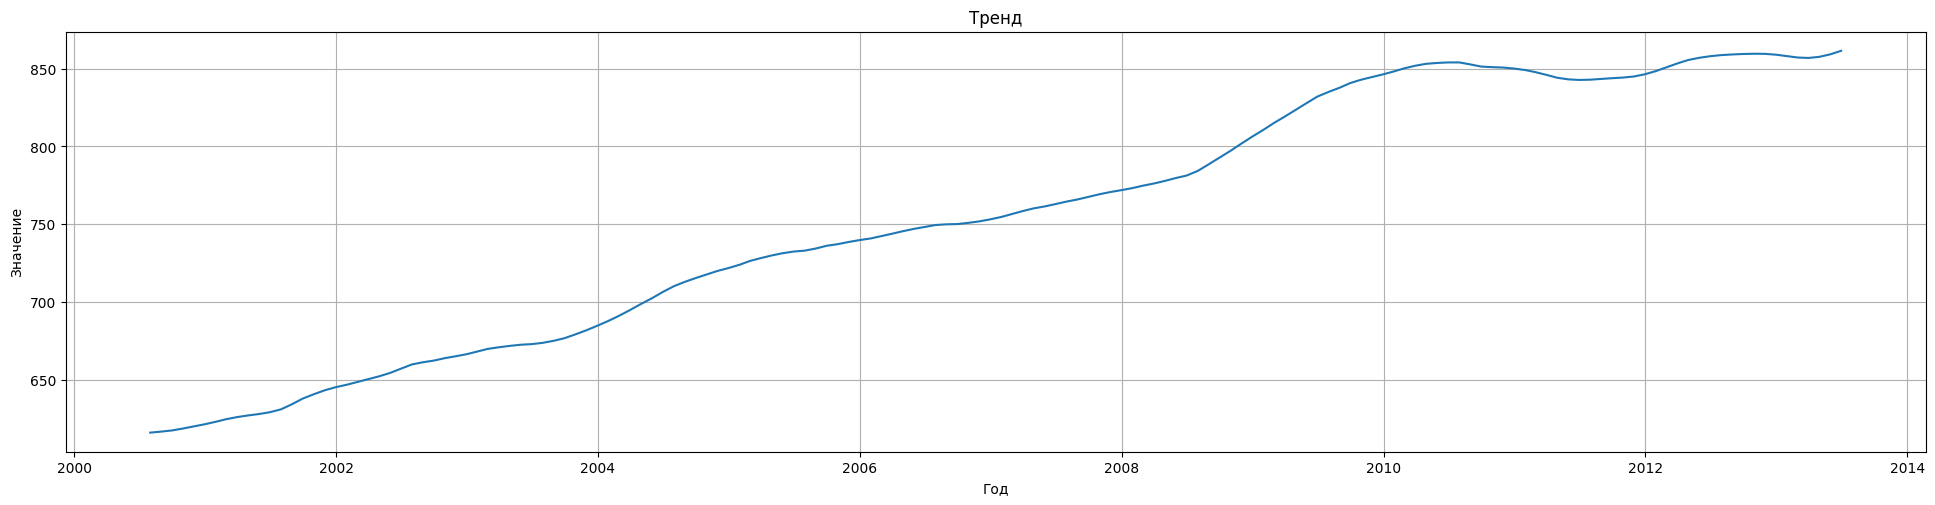

In [6]:
plt.figure(figsize=(24, 12))
plt.subplot(211)
plt.plot(result.trend)
plt.title('Тренд')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.grid(True)

# График сезонности

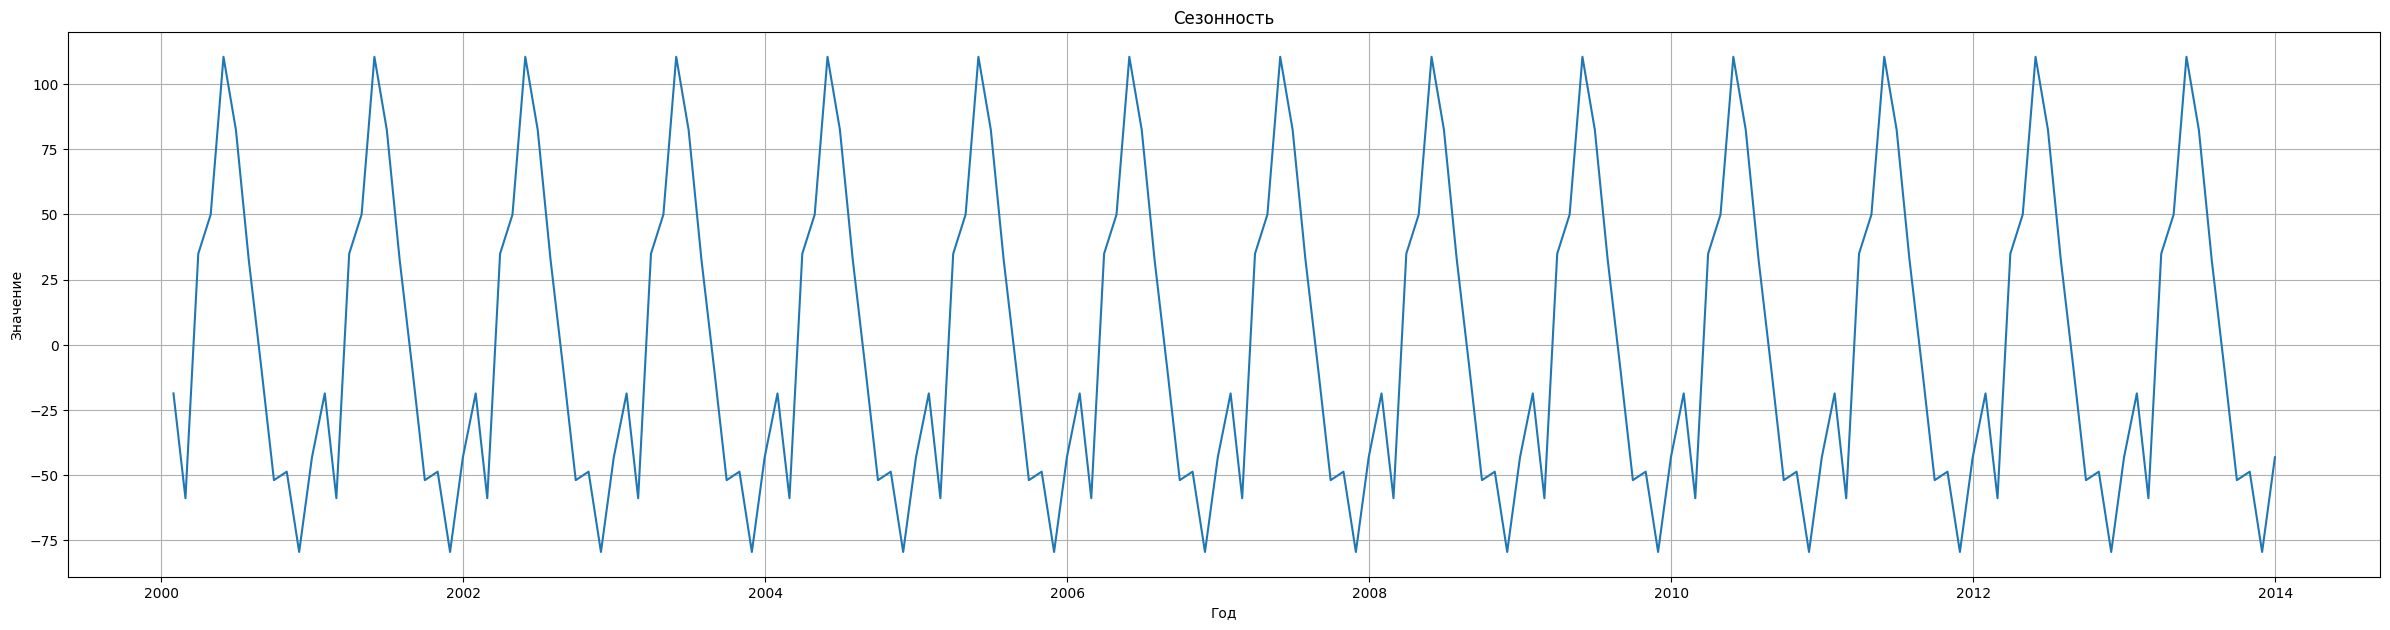

In [7]:
plt.figure(figsize=(24, 12))
plt.subplot(212)
plt.plot(result.seasonal)
plt.title('Сезонность')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
p, d, q = 1, 1, 1  # Параметры ARIMA (порядок авторегрессии, интеграции, скользящего среднего)
P, D, Q, s = 1, 1, 1, 12  # Параметры сезонности

### Объект SARIMA обучается на данных временного ряда.

In [9]:
model = SARIMAX(data['milk'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18862D+00    |proj g|=  5.20690D-02

At iterate    5    f=  3.16148D+00    |proj g|=  2.54617D-02

At iterate   10    f=  3.15409D+00    |proj g|=  1.81360D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   1.255D-05   3.154D+00
  F =   3.1540917424221173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


# Выполнение прогноза на 8 месяцев вперед

In [10]:
forecast_steps = 8
forecast = results.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Построение графиков исходного ряда и прогноза

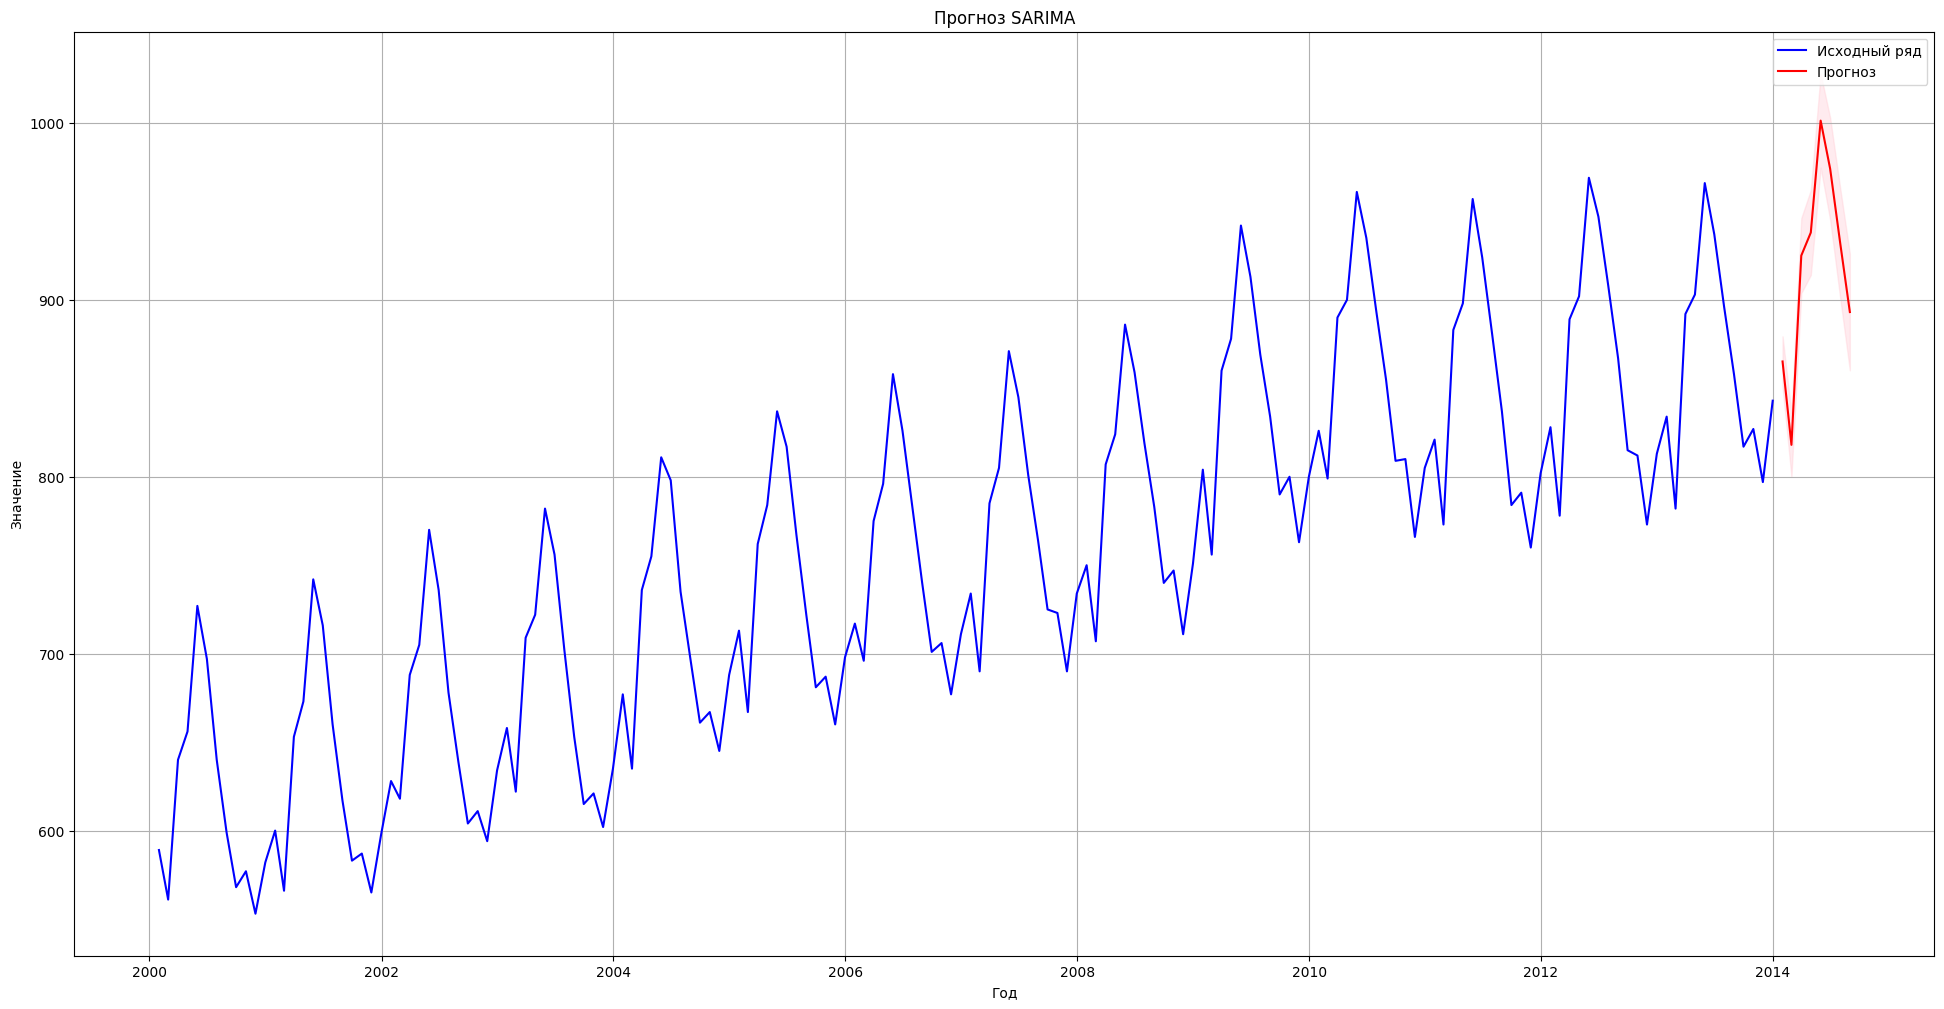

In [11]:
plt.figure(figsize=(24, 12))
plt.plot(data['milk'], label='Исходный ряд', color='blue')
plt.plot(forecast.predicted_mean, label='Прогноз', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink',
                 alpha=0.3)
plt.title('Прогноз SARIMA')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Вывод спрогнозированных значений

In [12]:
forecast_values = forecast.predicted_mean[-forecast_steps:]
print(f'Спрогнозированные значения на 8 месяцев вперед:\n{forecast_values}')

Спрогнозированные значения на 8 месяцев вперед:
2014-01-31     865.174111
2014-02-28     818.032984
2014-03-31     925.009744
2014-04-30     938.050293
2014-05-31    1001.299338
2014-06-30     974.036500
2014-07-31     932.842537
2014-08-31     893.109037
Freq: M, Name: predicted_mean, dtype: float64
